In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("indovateai").project("indovateai")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to INDOvateAI-4 in yolov8:: 100%|██████████| 250/250 [00:00<00:00, 5316.43it/s]


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [8]:
import os
import shutil
import random
from glob import glob

# Set paths
dataset_path = "/content/INDOvateAI-4"
train_images_folder = os.path.join(dataset_path, "train/images")
train_labels_folder = os.path.join(dataset_path, "train/labels")

val_images_folder = os.path.join(dataset_path, "val/images")
val_labels_folder = os.path.join(dataset_path, "val/labels")

test_images_folder = os.path.join(dataset_path, "test/images")
test_labels_folder = os.path.join(dataset_path, "test/labels")

# Create directories
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)
os.makedirs(test_images_folder, exist_ok=True)
os.makedirs(test_labels_folder, exist_ok=True)

# Get all image and label files
image_files = glob(os.path.join(train_images_folder, "*"))
random.shuffle(image_files)  # Shuffle for randomness

# Split dataset (80% Train, 10% Val, 10% Test)
num_val = int(len(image_files) * 0.1)
num_test = int(len(image_files) * 0.1)

val_files = image_files[:num_val]
test_files = image_files[num_val:num_val + num_test]

# Move validation and test images
for img in val_files:
    shutil.move(img, val_images_folder)
    label_path = os.path.join(train_labels_folder, os.path.basename(img).replace(".jpg", ".txt").replace(".png", ".txt"))
    if os.path.exists(label_path):
        shutil.move(label_path, val_labels_folder)

for img in test_files:
    shutil.move(img, test_images_folder)
    label_path = os.path.join(train_labels_folder, os.path.basename(img).replace(".jpg", ".txt").replace(".png", ".txt"))
    if os.path.exists(label_path):
        shutil.move(label_path, test_labels_folder)

print("✅ Validation and Test sets created successfully!")


✅ Validation and Test sets created successfully!


In [4]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")  # Use yolov8m.pt or yolov8l.pt for better accuracy

# Train the model
model.train(
    data="/content/INDOvateAI-4/data.yaml",  # Path to dataset YAML file
    epochs=25,  # Adjust based on requirement
    imgsz=640,  # Image size
    batch=16,  # Adjust based on GPU memory
    workers=2,  # Number of workers for data loading
)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/INDOvateAI-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.0MB/s]


AMP: checks passed ✅


train: Scanning /content/INDOvateAI-4/train/labels... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<00:00, 609.78it/s]

train: New cache created: /content/INDOvateAI-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/INDOvateAI-4/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 20336.02it/s]

val: New cache created: /content/INDOvateAI-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.05G      1.257      3.399      1.467         86        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          4         15     0.0186          1      0.507      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.03G       1.05      3.065      1.352        116        640: 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.48it/s]

                   all          4         15     0.0301      0.897       0.54      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.03G      1.001      2.469      1.328        115        640: 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all          4         15     0.0332      0.944      0.523      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.04G     0.9983      2.159      1.301        119        640: 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all          4         15      0.914      0.619      0.679      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.12G     0.9843      1.919      1.331         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all          4         15          1      0.233      0.785       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.01G      1.032      1.908      1.374         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all          4         15      0.971      0.238      0.699      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.06G     0.9724      1.626        1.3         99        640: 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all          4         15      0.917      0.561       0.86      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.03G     0.9709      1.521      1.286        117        640: 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.74it/s]

                   all          4         15      0.931      0.516       0.86      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.03G      0.951      1.401      1.266        103        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all          4         15      0.615      0.777      0.955      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.03G     0.8986      1.354       1.24         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all          4         15      0.642      0.781       0.93      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.06G      0.812      1.219       1.17         91        640: 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all          4         15      0.619      0.784      0.686      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.03G      0.873      1.247      1.213         80        640: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all          4         15       0.88      0.619      0.832      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.01G     0.8863      1.266      1.216         93        640: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          4         15      0.555      0.851      0.835      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.03G     0.8643      1.168      1.228         89        640: 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          4         15      0.931      0.619       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.03G     0.7873      1.077      1.166         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all          4         15      0.702      0.922      0.982      0.706


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.01G     0.7801      1.291      1.195         54        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all          4         15      0.733      0.958      0.987      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.01G     0.7154      1.126      1.136         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          4         15      0.802      0.913      0.956      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.01G     0.6912      1.136      1.118         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          4         15      0.698      0.849      0.862      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         2G     0.7158      1.123      1.131         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all          4         15      0.816      0.823      0.903      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.03G     0.6578       1.02      1.114         40        640: 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.15it/s]

                   all          4         15      0.836      0.875      0.923      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.01G     0.6395     0.9901      1.066         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          4         15      0.818      0.889      0.917       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.01G     0.6901      1.019      1.125         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all          4         15      0.822      0.877      0.924      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      1.99G     0.6303     0.9704      1.063         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          4         15      0.882      0.869      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.03G     0.6166     0.9658      1.056         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all          4         15      0.922      0.882      0.958      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.01G     0.6242     0.9797      1.055         43        640: 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          4         15       0.94      0.885      0.979      0.799



25 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]


                   all          4         15      0.941      0.885      0.979      0.799
            garbagebin          3          7      0.946          1      0.995      0.941
                person          2          2      0.877          1      0.995       0.92
               vehicle          1          6          1      0.656      0.948      0.536
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c8ab9772f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
from glob import glob
print(glob("/content/runs/detect/*/weights/*.pt"))


['/content/runs/detect/train/weights/best.pt', '/content/runs/detect/train/weights/last.pt']


Video FPS: 25, Width: 898, Height: 506, Total Frames: 248

0: 384x640 3 garbagebins, 40.5ms
Speed: 2.3ms preprocess, 40.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Processing frame 0/248


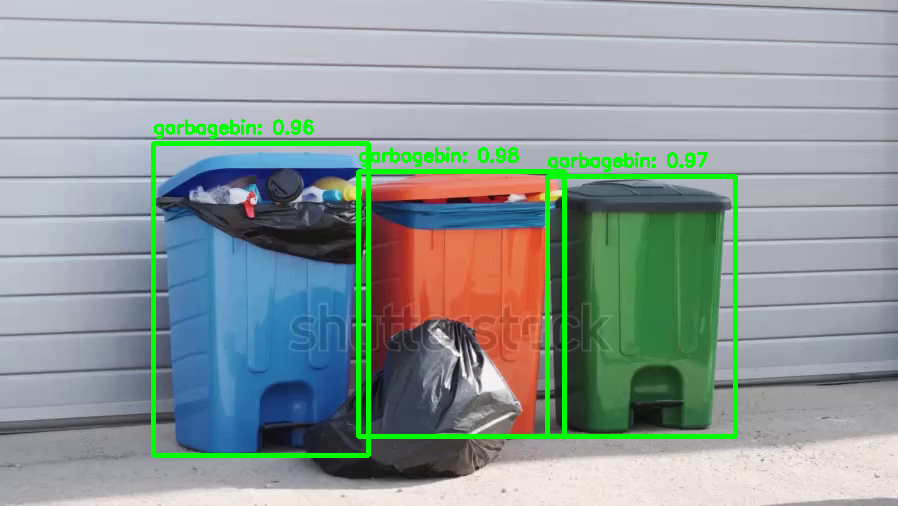


0: 384x640 3 garbagebins, 13.9ms
Speed: 3.2ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 10.8ms
Speed: 3.0ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 8.6ms
Speed: 3.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.4ms postprocess 

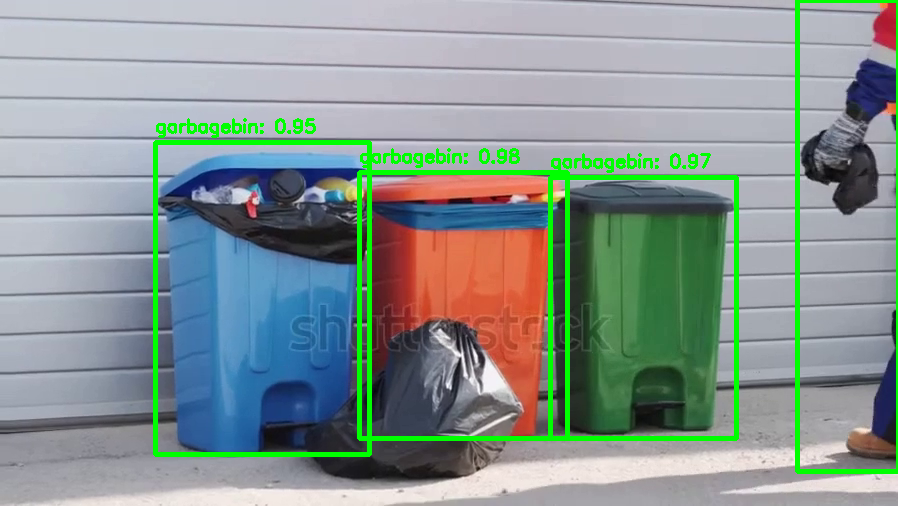


0: 384x640 3 garbagebins, 1 person, 12.0ms
Speed: 3.2ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.8ms
Speed: 3.2ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.4ms
Speed: 3.2ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.6ms
Speed: 3.2ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.3ms
Speed: 3.1ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.6ms
Speed: 3.1ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebi

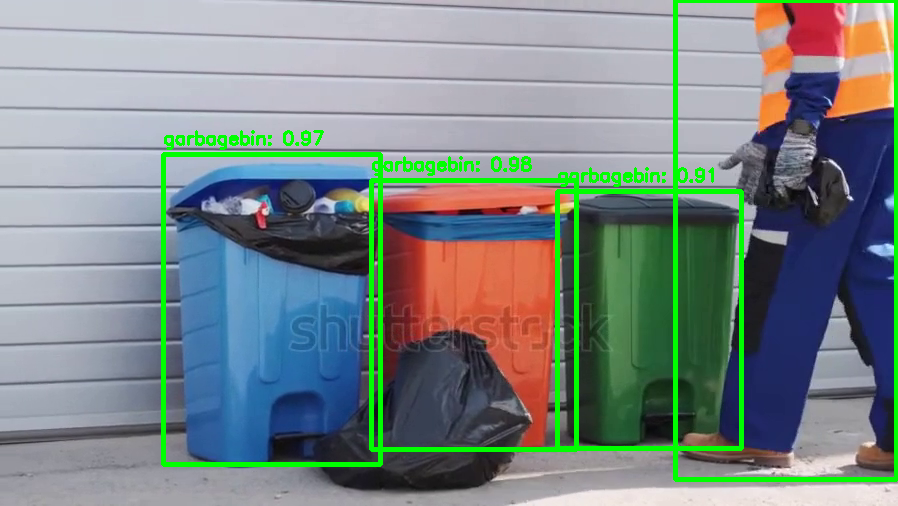


0: 384x640 3 garbagebins, 1 person, 10.9ms
Speed: 3.3ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.4ms
Speed: 2.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.1ms
Speed: 3.1ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.7ms
Speed: 3.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 11.5ms
Speed: 3.4ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.9ms
Speed: 3.5ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.1ms
Speed: 4.5ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbage

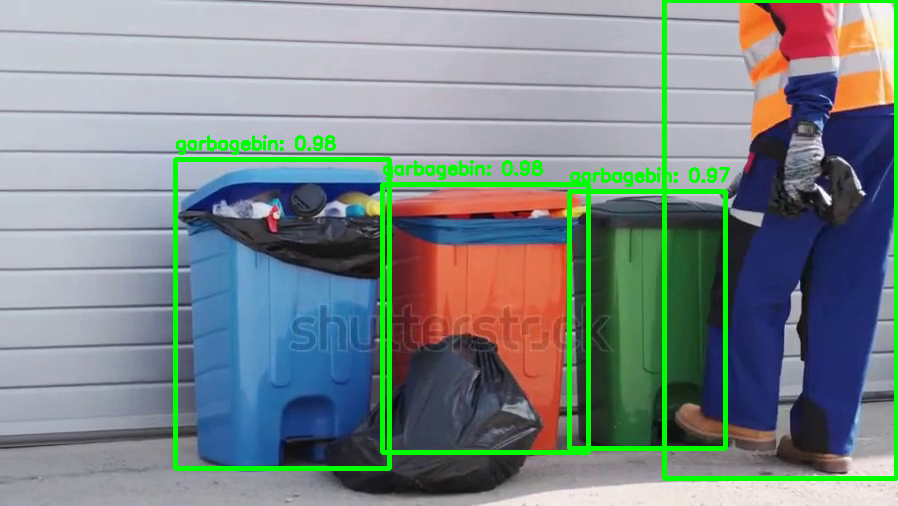


0: 384x640 3 garbagebins, 1 person, 16.8ms
Speed: 3.1ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 11.0ms
Speed: 3.4ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.9ms
Speed: 3.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.4ms
Speed: 3.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebi

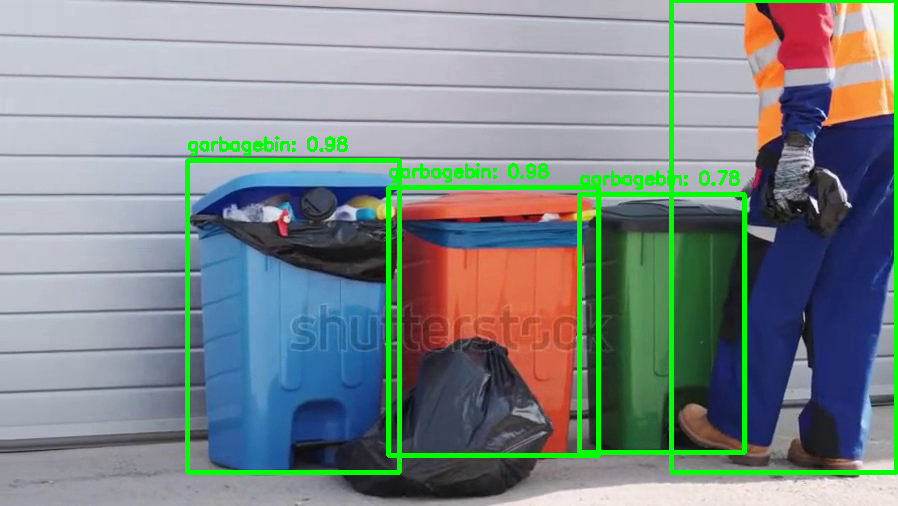


0: 384x640 3 garbagebins, 1 person, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 12.1ms
Speed: 3.0ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 12.4ms
Speed: 3.1ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.5ms
Speed: 3.1ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbage

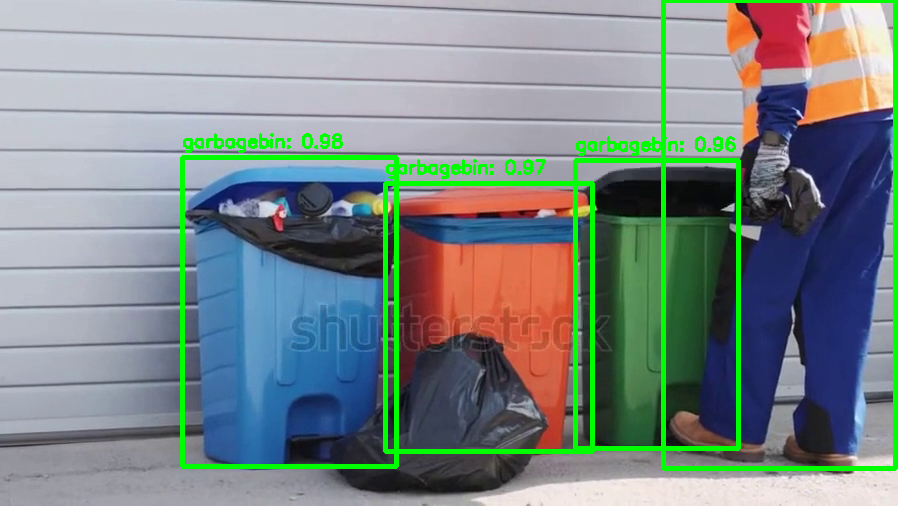


0: 384x640 3 garbagebins, 1 person, 13.7ms
Speed: 3.1ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 11.0ms
Speed: 3.7ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 13.8ms
Speed: 3.0ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 14.3ms
Speed: 3.1ms preprocess, 14.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 16.3ms
Speed: 3.1ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 gar

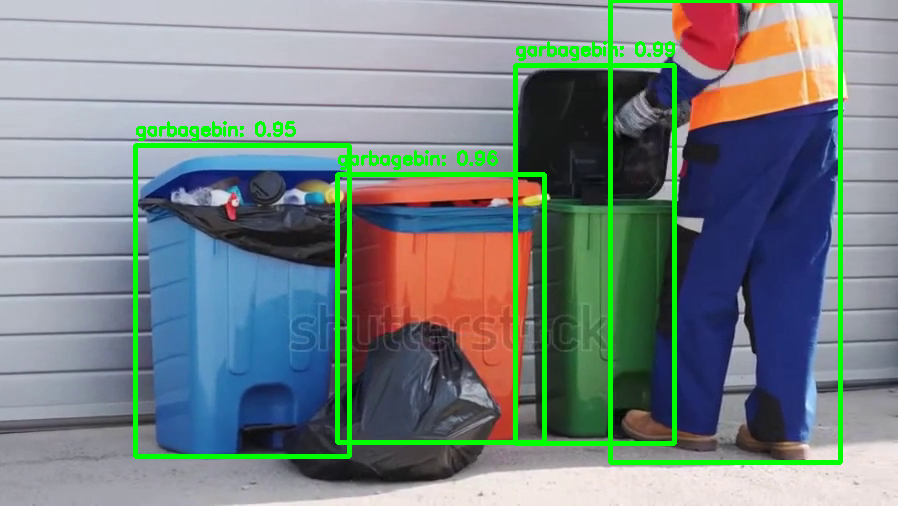


0: 384x640 3 garbagebins, 1 person, 13.6ms
Speed: 3.5ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.5ms
Speed: 3.2ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 12.1ms
Speed: 2.9ms preprocess, 12.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 12.9ms
Speed: 3.0ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3

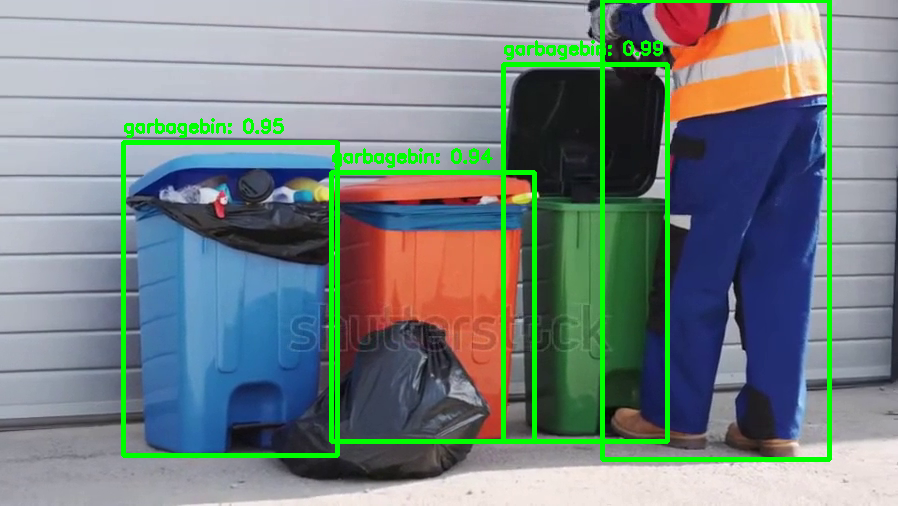


0: 384x640 3 garbagebins, 1 person, 14.3ms
Speed: 6.4ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.4ms
Speed: 5.2ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.3ms
Speed: 3.4ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 10.5ms
Speed: 3.5ms preprocess, 10.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 18.5ms
Speed: 3.5ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 14.7ms
Speed: 6.3ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 12.3ms
Speed: 3.4ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3

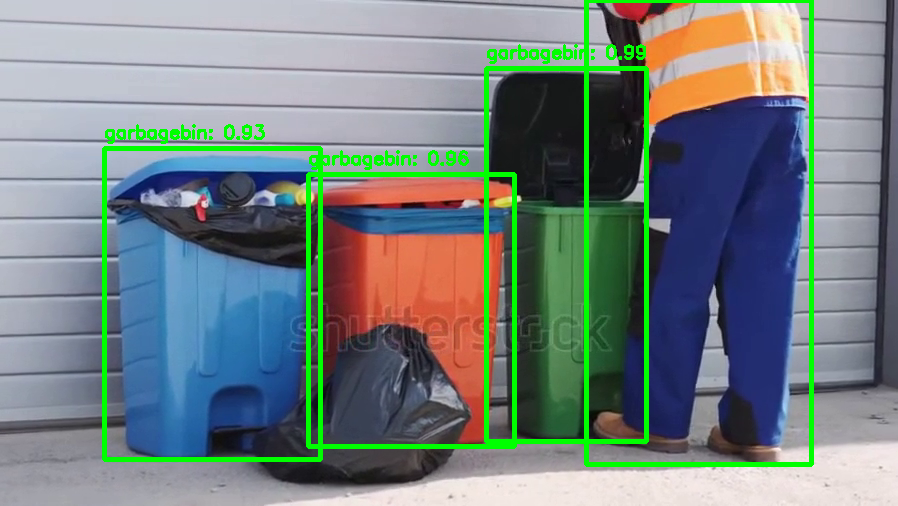


0: 384x640 3 garbagebins, 1 person, 13.5ms
Speed: 3.2ms preprocess, 13.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 15.5ms
Speed: 3.2ms preprocess, 15.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 19.2ms
Speed: 4.2ms preprocess, 19.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 13.5ms
Speed: 3.1ms preprocess, 13.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 garbagebins, 1 person, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Video processing complete!
✅ Processed video saved at: /content/output_video1.mp4


In [6]:
import cv2
import torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the trained YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Update with your model path

# Path to the test video
video_path = "/content/stock-footage-waste-management-worker-collects-bins-for-recycling-in-a-city-during-the-morning-shift (online-video-cutter.com).mp4"  # Change to your video path
output_path = "/content/output_video1.mp4"  # Output video path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Video width
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Video height
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total frames

print(f"Video FPS: {fps}, Width: {width}, Height: {height}, Total Frames: {frame_count}")

# Define the video writer with correct size and FPS
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_counter = 0

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video processing complete!")
        break  # End of video

    # Run YOLO on the frame
    results = model(frame)

    # Draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = int(box.cls[0].item())  # Class ID

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

            # Put label
            label = f"{model.names[cls]}: {conf:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Write processed frame to the output video
    out.write(frame)

    # Show every 30th frame in Colab (to avoid too many outputs)
    if frame_counter % 30 == 0:
        print(f"Processing frame {frame_counter}/{frame_count}")
        cv2_imshow(frame)

    frame_counter += 1

# Release resources
cap.release()
out.release()

print(f"✅ Processed video saved at: {output_path}")


In [8]:
import shutil
from google.colab import files

# Define the path to the model weights
model_dir = "/content/runs/detect/train/weights"

# Create a zip file
shutil.make_archive("/content/yolo_model", 'zip', model_dir)

# Download the zip file
files.download("/content/yolo_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>